<a href="https://colab.research.google.com/github/FandiRahman/Data-Analysis/blob/main/Dinamika_Pasar_Airbnb_di_Kota_New_York_EDA_(Exploratory_Data_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dinamika Pasar Airbnb di Kota New York: EDA (Exploratory Data Analysis)


### Latar Belakang:

Kota New York, sebagai salah satu destinasi paling populer di dunia, menawarkan sejumlah besar properti Airbnb untuk memenuhi permintaan tinggi akan akomodasi sementara, baik untuk beberapa malam maupun beberapa bulan. Dalam analisis ini, kita akan menjelajahi lebih lanjut pasar Airbnb di Kota New York. Dataset ini memberikan pandangan unik dan komprehensif tentang industri Airbnb yang luas di Kota New York. Kami berhasil mengumpulkan data dari lebih dari 20,000 Airbnb beserta informasi terkait seperti deskripsi, tarif, ulasan, dan ketersediaan. Profesional yang meneliti industri ini akan menemukan sumber daya ini sangat berharga untuk memberikan wawasan tentang pasar Airbnb yang selalu populer, yang dapat digunakan untuk keuntungan mereka.

Tentang Dataset:

File train.csv dalam dataset ini berisi informasi rinci tentang lebih dari 20,000 Airbnb di Kota New York, termasuk nama host, lingkungan, jenis kamar, harga, jumlah malam minimum, jumlah ulasan, tanggal ulasan terakhir, ulasan per bulan, jumlah listing yang dihitung oleh host, dan ketersediaan.

name: Nama properti Airbnb. (String)
host_name: Nama tuan rumah properti Airbnb. (String)
neighbourhood_group: Kelompok lingkungan tempat properti Airbnb berada. (String)
latitude: Koordinat latitude properti Airbnb. (Float)
longitude: Koordinat longitude properti Airbnb. (Float)
room_type: Jenis kamar yang ditawarkan oleh properti Airbnb. (String)
price: Harga per malam properti Airbnb. (Integer)
minimum_nights: Jumlah malam minimum yang diperlukan untuk memesan properti Airbnb. (Integer)
number_of_reviews: Total jumlah ulasan yang diterima properti Airbnb. (Integer)
last_review: Tanggal ulasan terakhir yang diterima properti Airbnb. (Date)
reviews_per_month: Rata-rata jumlah ulasan yang diterima properti Airbnb per bulan. (Float)
calculated_host_listings_count: Total jumlah listing yang dimiliki oleh tuan rumah. (Integer)
availability_365: Jumlah hari properti Airbnb tersedia untuk pemesanan dalam setahun. (Integer)


### Tujuan:

Tujuan dari analisa ini adalah menjawab beberapa pertanyaan, di antaranya:

1. Bagaimana perbandingan harga kamar berdasarkan jenis kamar dan wilayah?
2. Bagaimana perbandingan jumlah listing dan pemilik listing berdasarkan wilayah?
3. Siapa tuan rumah yang memiliki ulasan terbanyak?

Analisis ini akan memberikan wawasan mendalam tentang dinamika pasar Airbnb di Kota New York, memungkinkan pengambilan keputusan strategis yang berdasarkan pada pemahaman yang kuat terhadap tren dan pola yang ada.

## Persiapan

In [67]:
# Menyiapkan semua library yang dibutuhkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [68]:
# Memuat tabel df_train
df_train = pd.read_csv("/content/drive/MyDrive/Air BNB New York 2/train.csv")
print(df_train.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

Melihat informasi awal data yang akan digunakan untuk analisa lebih lanjut.

## Penilaian

In [69]:
# Menilai data df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Melihat ringkasan statistik data dan menilai apakah ada kolom dengan missing value atau nilai yang hilang dan tipe data yang perlu diubah untuk analisis lebih lanjut.

In [70]:
# Menilai parameter statistik data df_train
df_train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Melihat gambaran umum tentang distribusi nilai-nilai dalam setiap kolom numerik pada data, serta mengidentifikasi potensi anomali atau nilai ekstrem. Statistik yang diberikan meliputi count (jumlah data), mean (rata-rata), std (standar deviasi), min (nilai minimum), 25% (kuartil pertama), 50% (median atau kuartil kedua), 75% (kuartil ketiga), dan max (nilai maksimum).

In [71]:
# Menilai missing value
df_train.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Dapat diperhatikan jika kolom name, host_name, last_review, dan reviews_per_month memiliki sejumlah missing value atau nilai hilang yang perlu ditangani.

In [72]:
# Menilai duplikasi data
print("Jumlah duplikasi: ", df_train.duplicated().sum())

Jumlah duplikasi:  0


 Mencoba mengevaluasi jumlah duplikasi dalam Data dan setelah dilakukan pengecekan tidak terdapat duplikasi dalam data.

## Data Cleaning

Dari hasil penilaian data sebelumnya ditemukan missing value pada kolom name, host_name, last_review, dan reviews_per_month.

In [73]:
# Missing value pada kolom name dan host_name
unique_names = df_train['name'].unique()
print("Unique Names:", unique_names)

unique_host_names = df_train['host_name'].unique()
print("Unique Host Names:", unique_host_names)

Unique Names: ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]
Unique Host Names: ['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']


In [74]:
# Mengisi nilai kosong pada kolom 'name' dengan "Unknown"
df_train['name'].fillna('Unknown', inplace=True)
# Mengisi nilai kosong pada kolom 'host_name' dengan "Unknown"
df_train['host_name'].fillna('Unknown', inplace=True)

# Menampilkan data setelah perbaikan
df_train.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Hasil pengecekan awal menunjukkan bahwa data ini tidak memerlukan perlakuan khusus apapun karena dianggap tidak akan mengganggu pada proses analisa nantinya. Namun untuk nilai yang kosong akan diganti dengan "unkown".

In [75]:
# Missing value pada kolom last_review

# Mengisi nilai kosong pada kolom 'last_review' dengan tanggal awal
df_train['last_review'].fillna(pd.to_datetime('1900-01-01'), inplace=True)

# Menampilkan data setelah perbaikan
df_train.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Pada kolom 'last_review' dilakukan konversi ke tipe data datetime. Ini bermanfaat karena memungkinkan Anda untuk bekerja dengan tanggal lebih mudah, seperti melakukan operasi perbandingan atau ekstraksi informasi tanggal.

In [76]:
# Missing value pada kolom reviews_per_month

# Mengisi nilai null dengan nilai rata-rata
mean_reviews_per_month = df_train['reviews_per_month'].mean()
df_train['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)

# Menampilkan data setelah perbaikan
df_train.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

 Pada reviews_per_month dilakukan pengisian nilai kosong (NaN) di kolom tersebut dengan nilai rata-rata.

In [77]:
# Menampilkan df_train yang telah diperbaiki
print(df_train.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire ho

## EDA (Exploratory Data Analysis)

Tujuan dari EDA adalah menjawab beberapa pertanyaan yang diajukan sebelumnnya, antara lain:
1. Bagaimana perbandingan harga kamar berdasarkan jenis kamar dan wilayah?
2. Bagaimana perbandingan jumlah listing dan pemilik listing berdasarkan wilayah?
3. Siapa tuan rumah yang memiliki reviews terbanyak?

### Bagaimana perbandingan harga kamar berdasarkan jenis kamar dan wilayah?

In [78]:
# Menampilkan parameter statistik untuk perbandingan harga kamar
room_type_neighbourhood_stats = df_train.groupby(['room_type', 'neighbourhood_group'])['price'].describe()

# Menampilkan hasil
print(room_type_neighbourhood_stats)

                                       count        mean         std   min  \
room_type       neighbourhood_group                                          
Entire home/apt Bronx                  379.0  127.506596   95.027102  28.0   
                Brooklyn              9559.0  178.327545  226.415825   0.0   
                Manhattan            13199.0  249.239109  331.830132   0.0   
                Queens                2096.0  147.050573  129.383208  10.0   
                Staten Island          176.0  173.846591  394.600216  48.0   
Private room    Bronx                  652.0   66.788344  107.009071   0.0   
                Brooklyn             10132.0   76.500099  124.713499   0.0   
                Manhattan             7982.0  116.776622  190.191318  10.0   
                Queens                3372.0   71.762456  180.506756  10.0   
                Staten Island          188.0   62.292553   36.138245  20.0   
Shared room     Bronx                   60.0   59.800000  101.79

Dari ringkasan statistik tersebut, beberapa temuan menarik atau pola mungkin dapat diidentifikasi seperti:

1. Perbedaan Harga Sewa Antar Tipe Kamar:
Rata-rata harga sewa "Entire home/apt" cenderung lebih tinggi daripada "Private room" dan "Shared room" di setiap neighbourhood_group. Ini sesuai dengan harapan umum, karena menyewa seluruh apartemen atau rumah biasanya lebih mahal.

2. Perbedaan Harga Sewa Antar neighbourhood_group:
Manhattan memiliki rata-rata harga sewa yang lebih tinggi dibandingkan dengan borough lainnya untuk setiap tipe kamar. Ini mungkin mencerminkan tingginya biaya hidup di Manhattan.

3. Variabilitas Harga Sewa:
Standar deviasi (std) yang tinggi pada beberapa neighbourhood_group atau tipe kamar mungkin menunjukkan variasi harga yang besar. Ini bisa disebabkan oleh faktor-faktor seperti lokasi spesifik, fasilitas, atau perbedaan dalam jumlah kamar yang ditawarkan.

4. Outlier:
Nilai maksimum yang jauh lebih tinggi dari kuartil atas dapat menunjukkan adanya outlier atau properti sewa yang sangat mahal di beberapa neighbourhood_group atau tipe kamar tertentu.

In [79]:
# Menghitung rata-rata harga per malam berdasarkan wilayah dan jenis kamar
room_type_neighbourhood_stats_mean = df_train.groupby(['neighbourhood_group', 'room_type'])['price'].mean()

# Menampilkan hasil
print(room_type_neighbourhood_stats_mean)

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64


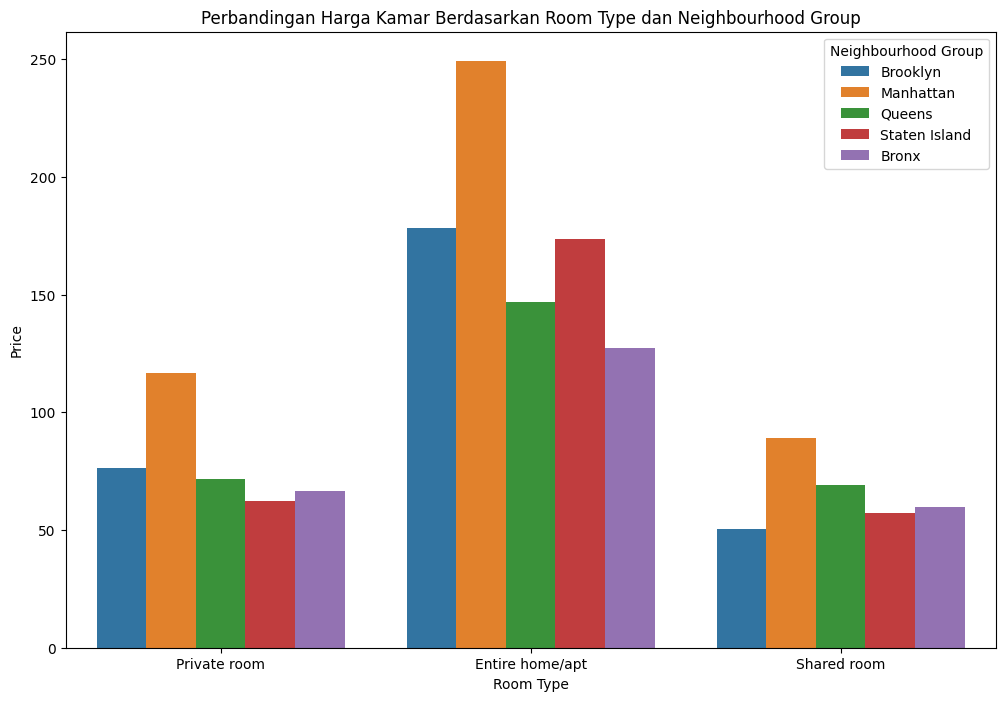

In [80]:
# Membuat diagram batang
plt.figure(figsize=(12, 8))
sns.barplot(x='room_type', y='price', hue='neighbourhood_group', data=df_train, ci=None)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Perbandingan Harga Kamar Berdasarkan Room Type dan Neighbourhood Group')
plt.legend(title='Neighbourhood Group')
plt.show()

Dari data tersebut, terdapat beberapa pengamatan umum yang dapat ditarik. Pertama, dapat diamati bahwa harga rata-rata tertinggi terdapat di Manhattan, khususnya untuk kategori "Entire home/apt" yang mencapai 249.24. Kedua, perbedaan harga yang signifikan terlihat antar kelompok lingkungan. Manhattan menonjol dengan harga yang jauh lebih tinggi dibandingkan dengan Bronx, Brooklyn, Queens, dan Staten Island. Ketiga, tipe kamar juga memainkan peran penting dalam menentukan harga. Secara umum, "Entire home/apt" memiliki harga yang lebih tinggi dibandingkan dengan "Private room" dan "Shared room". Terakhir, menariknya, Staten Island tampaknya menawarkan harga yang cukup bersaing, terutama untuk kategori "Entire home/apt". Analisis semacam ini memberikan wawasan yang berharga untuk memahami dinamika harga properti di berbagai lingkungan dan tipe kamar di New York City.



### Bagaimana perbandingan jumlah listing dan pemilik listing berdasarkan wilayah?

In [81]:
# Menghitung jumlah properti untuk setiap kelompok lingkungan
neighbourhood_group_counts = df_train['neighbourhood_group'].value_counts()
# Menampilkan hasil
print(neighbourhood_group_counts)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


Masing-masing kelompok lingkungan memiliki jumlah properti yang berbeda, yang dapat memberikan pemahaman tentang sebaran dan distribusi properti di berbagai wilayah. Manhattan memiliki jumlah properti tertinggi (21,661), diikuti oleh Brooklyn (20,104), Queens (5,666), Bronx (1,091), dan Staten Island (373).

In [82]:
# Menghitung jumlah properti untuk setiap kombinasi room type dan neighbourhood group
room_type_neighbourhood_counts = df_train.groupby(['room_type', 'neighbourhood_group']).size().reset_index(name='counts')

# Menampilkan hasil
print(room_type_neighbourhood_counts)

          room_type neighbourhood_group  counts
0   Entire home/apt               Bronx     379
1   Entire home/apt            Brooklyn    9559
2   Entire home/apt           Manhattan   13199
3   Entire home/apt              Queens    2096
4   Entire home/apt       Staten Island     176
5      Private room               Bronx     652
6      Private room            Brooklyn   10132
7      Private room           Manhattan    7982
8      Private room              Queens    3372
9      Private room       Staten Island     188
10      Shared room               Bronx      60
11      Shared room            Brooklyn     413
12      Shared room           Manhattan     480
13      Shared room              Queens     198
14      Shared room       Staten Island       9


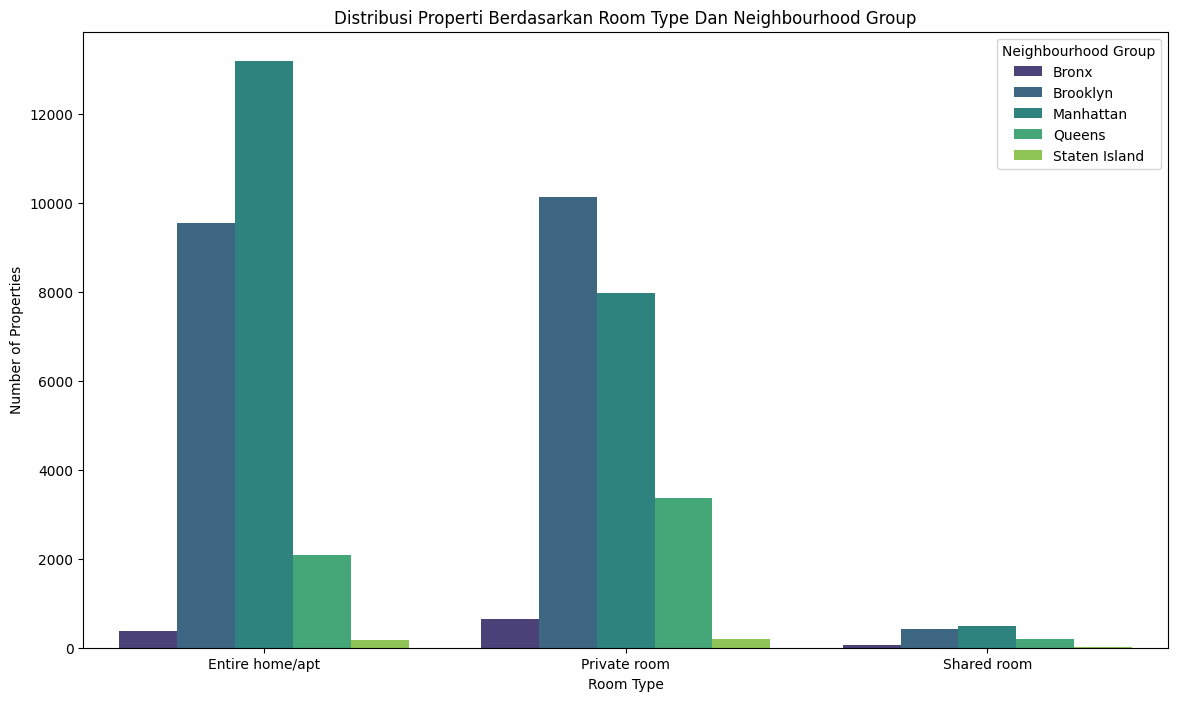

In [89]:
# Membuat diagram batang
plt.figure(figsize=(14, 8))
sns.barplot(x='room_type', y='counts', hue='neighbourhood_group', data=room_type_neighbourhood_counts, palette='viridis')
plt.xlabel('Room Type')
plt.ylabel('Number of Properties')
plt.title('Distribusi Properti Berdasarkan Room Type Dan Neighbourhood Group')
plt.legend(title='Neighbourhood Group')
plt.show()

Dapat dilihat bahwa jumlah properti yang tersedia untuk setiap kombinasi tipe kamar room_type dan neighbourhood_group. Mayoritas properti yang tersedia adalah tipe "Entire home/apt" di Manhattan dengan total 13,199 properti, diikuti oleh Brooklyn dengan 9,559 properti. Sementara itu, tipe kamar "Private room" paling banyak tersedia di Brooklyn dengan 10,132 properti, diikuti oleh Manhattan dengan 7,982 properti. Sedangkan tipe "Shared room" memiliki ketersediaan yang lebih rendah, dengan jumlah terendah terdapat pada Staten Island dengan hanya 9 properti.

Dengan demikian, dapat disimpulkan bahwa Manhattan memiliki jumlah properti tertinggi, dan tipe kamar "Entire home/apt" menjadi pilihan yang paling umum di wilayah tersebut. Brooklyn juga menonjol sebagai wilayah dengan jumlah properti yang signifikan, terutama untuk tipe "Private room".

In [84]:
# Menemukan 10 tuan rumah dengan jumlah listing terbanyak
top_host_listings = df_train.groupby('host_id')['room_type'].count().reset_index(name='total_listings')
top_host_listings = top_host_listings.sort_values(by='total_listings', ascending=False).head(10)

# Menampilkan hasil
print(top_host_listings[['host_id', 'total_listings']])

         host_id  total_listings
34646  219517861             327
29407  107434423             232
19574   30283594             121
31079  137358866             103
14436   16098958              96
12806   12243051              96
25662   61391963              91
17091   22541573              87
33868  200380610              65
3044     1475015              52


In [85]:
# host_id yang ingin dicari
host_ids_to_find = [219517861, 107434423, 30283594, 137358866, 16098958, 12243051, 61391963, 22541573, 200380610, 1475015]

# Mencari nama host berdasarkan host_id
host_names = df_train[df_train['host_id'].isin(host_ids_to_find)][['host_id', 'host_name']].drop_duplicates()

# Menampilkan hasil
print(host_names)

         host_id          host_name
1386     1475015               Mike
5093    16098958     Jeremy & Laura
9740    30283594               Kara
14682   61391963  Corporate Housing
15865   22541573                Ken
26137  107434423         Blueground
30637   12243051             Sonder
32718  137358866             Kazuya
34010  200380610            Pranjal
38293  219517861       Sonder (NYC)


Dari hasil pemrosesan data, terlihat bahwa tuan rumah dengan host_id 219517861 memiliki jumlah listing tertinggi, yaitu sebanyak 327 listing. Disusul oleh tuan rumah dengan host_id 107434423 yang memiliki 232 listing, dan ketiga oleh tuan rumah dengan host_id 30283594 yang memiliki 121 listing.

Untuk mengidentifikasi nama-nama tuan rumah tersebut, telah dilakukan pencarian berdasarkan host_id yang tercantum dalam hasil sebelumnya. Hasilnya menunjukkan bahwa tuan rumah dengan host_id 219517861 adalah "Sonder (NYC)", tuan rumah dengan host_id 107434423 adalah "Blueground", dan tuan rumah dengan host_id 30283594 adalah "Kara". Demikian pula, nama-nama tuan rumah lainnya dapat diidentifikasi sesuai dengan host_id masing-masing.

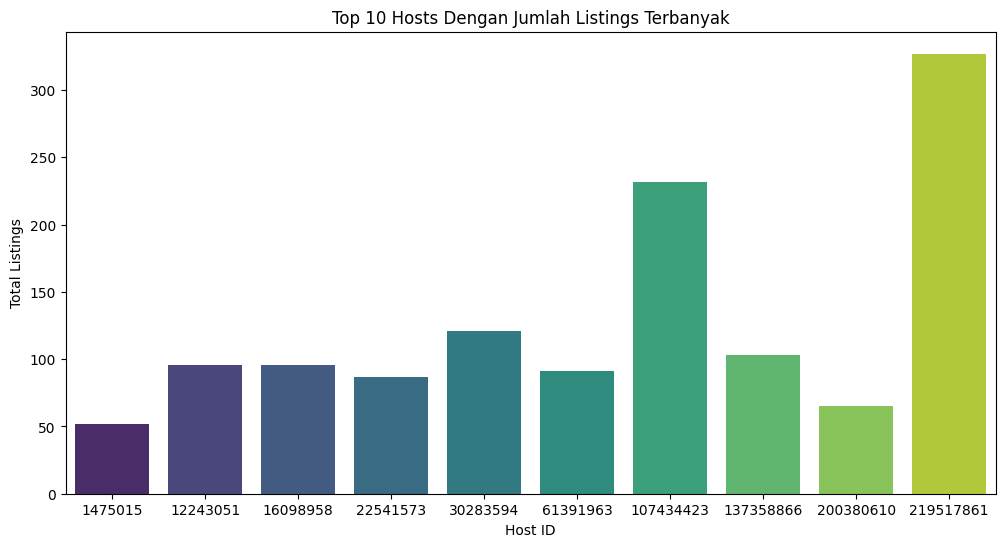

In [86]:
# Membuat diagram batang
plt.figure(figsize=(12, 6))
sns.barplot(x='host_id', y='total_listings', data=top_host_listings, palette='viridis')
plt.xlabel('Host ID')
plt.ylabel('Total Listings')
plt.title('Top 10 Hosts Dengan Jumlah Listings Terbanyak')
plt.show()

### Siapa tuan rumah yang memiliki reviews terbanyak?


In [87]:
# Menghitung total number_of_reviews untuk setiap kombinasi name dan host_id
total_reviews_per_host_name = df_train.groupby(['name', 'host_id', 'host_name', 'neighbourhood_group', 'room_type', 'price'])['number_of_reviews'].sum()

# Membuat DataFrame baru dari hasil perhitungan
df_total_reviews = pd.DataFrame(total_reviews_per_host_name).reset_index()

# Membuat peringkat top 10 berdasarkan total number_of_reviews
top_15_reviews = df_total_reviews.sort_values(by='number_of_reviews', ascending=False).head(15)

# Tampilkan hasilnya dengan kolom-kolom tertentu
print(top_15_reviews[['name', 'host_id', 'number_of_reviews', 'host_name', 'neighbourhood_group', 'room_type', 'price']])

                                                    name   host_id  \
37193                            Room near JFK Queen Bed  47621202   
21219                         Great Bedroom in Manhattan   4734398   
5762                      Beautiful Bedroom in Manhattan   4734398   
33320                       Private Bedroom in Manhattan   4734398   
36821                            Room Near JFK Twin Beds  47621202   
41273                  Steps away from Laguardia airport  37312959   
28185           Manhattan Lux Loft.Like.Love.Lots.Look !   2369681   
15476  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133   
34665                 Private brownstone studio Brooklyn  12949460   
26248                   Loft Suite @ The Box House Hotel    417504   
24229                    LG Private Room/Family Friendly    792159   
29792                   My Little Guest Room in Flushing   2680820   
32066                       Park Slope Green Guest House     42273   
8656                

Berdasarkan hasil perhitungan total jumlah ulasan untuk setiap kombinasi nama (name) dan ID host (host_id), terdapat beberapa properti yang mendapatkan jumlah ulasan tertinggi. Properti dengan nama "Room near JFK Queen Bed" yang dimiliki oleh tuan rumah dengan ID 47621202 dan nama "Dona" mendominasi peringkat pertama dengan total 629 ulasan. Diikuti oleh beberapa properti lainnya, seperti "Great Bedroom in Manhattan" dan "Beautiful Bedroom in Manhattan" yang dimiliki oleh tuan rumah dengan ID 4734398 dan nama "Jj" dengan total ulasan masing-masing 607 dan 597.

Secara umum, properti-properti ini tersebar di berbagai lingkungan (neighbourhood_group) seperti Queens, Manhattan, dan Brooklyn, dengan jenis kamar (room_type) yang bervariasi, mulai dari kamar pribadi hingga seluruh unit rumah/apartemen. Harga (price) properti juga bervariasi, mencerminkan berbagai pilihan akomodasi yang tersedia.

Selain itu, perlu diperhatikan bahwa beberapa tuan rumah, seperti "Dona" dan "Maya," mungkin memiliki lebih dari satu properti dengan jumlah ulasan yang signifikan. Properti dengan jenis kamar "Private room" mendominasi peringkat teratas, sementara properti dengan jenis "Entire home/apt" juga termasuk di dalamnya, menunjukkan variasi dalam preferensi penginapan yang dicari oleh pengunjung.

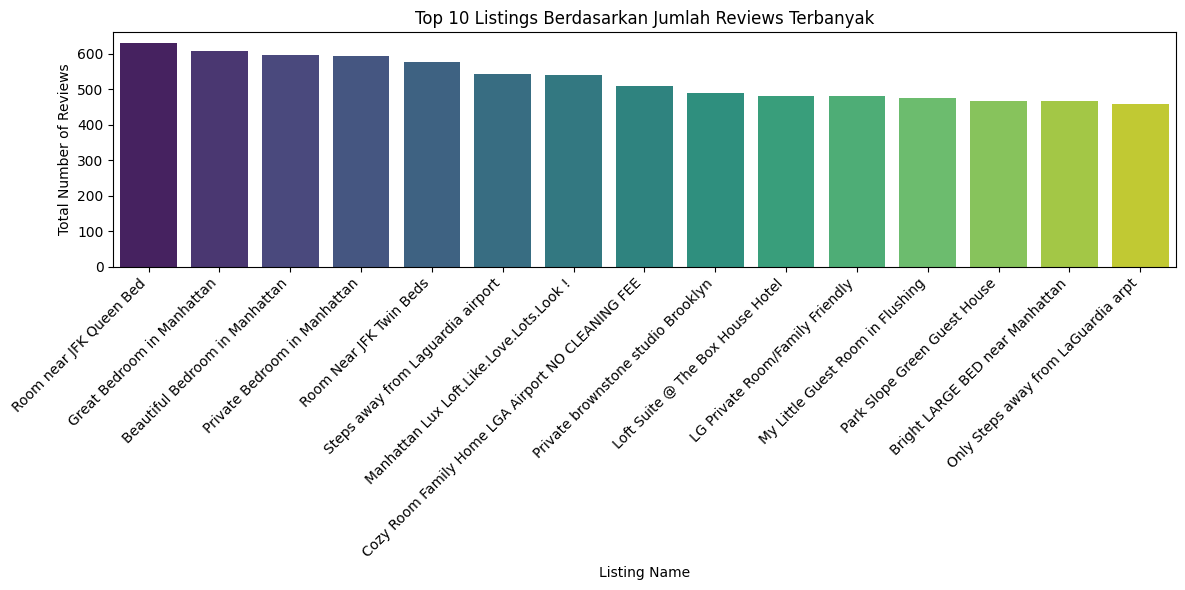

In [88]:
# Membuat Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='number_of_reviews', data=top_15_reviews, palette='viridis')
plt.xlabel('Listing Name')
plt.ylabel('Total Number of Reviews')
plt.title('Top 10 Listings Berdasarkan Jumlah Reviews Terbanyak')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Analisa Temuan


Berdasarkan hasil analisis EDA (Exploratory Data Analysis) yang telah dilakukan, terdapat beberapa kesimpulan yang dapat diambil sebagai panduan bisnis:

1. Dalam analisis harga properti, terungkap bahwa rata-rata harga sewa untuk tipe "Entire home/apt" cenderung lebih tinggi dibandingkan dengan tipe "Private room" dan "Shared room" di setiap neighbourhood_group. Lebih lanjut, Manhattan menonjol dengan rata-rata harga sewa yang lebih tinggi daripada borough lainnya, mengindikasikan tingginya biaya hidup di wilayah tersebut. Variabilitas harga sewa yang signifikan antar neighbourhood_group dan tipe kamar menunjukkan kompleksitas dinamika pasar. Sebagai panduan bisnis, disarankan untuk memfokuskan upaya pemasaran pada properti "Entire home/apt" di Manhattan, sambil tetap menyediakan variasi tipe kamar untuk mengakomodasi berbagai preferensi pelanggan. Penting juga untuk mempertimbangkan kebijakan harga yang bersaing dan fleksibel, terutama di daerah-daerah dengan standar deviasi harga yang tinggi, guna menjaga daya saing dan fleksibilitas dalam menyesuaikan strategi harga dengan kondisi pasar yang berubah-ubah.

2. Distribusi properti di New York City menunjukkan pola yang jelas, dengan jumlah properti tertinggi terdapat di Manhattan, diikuti oleh Brooklyn, Queens, Bronx, dan Staten Island. Analisis lebih lanjut mengungkapkan bahwa properti "Entire home/apt" menjadi pilihan yang paling umum di Manhattan, sementara "Private room" lebih dominan di Brooklyn. Untuk mengoptimalkan peluang bisnis, disarankan untuk memprioritaskan pengembangan properti di kedua wilayah ini, mengingat tingginya permintaan dan keberagaman preferensi pelanggan. Selain itu, strategi pengelolaan jenis properti perlu disesuaikan dengan kecenderungan lokal; misalnya, menyediakan lebih banyak "Entire home/apt" di Manhattan dan lebih banyak "Private room" di Brooklyn untuk meningkatkan daya tarik properti di masing-masing wilayah. Dengan demikian, mengakomodasi preferensi regional dapat menjadi kunci keberhasilan dalam mengoptimalkan distribusi properti dan meningkatkan pangsa pasar di berbagai lingkungan di New York City.

3. Mengenai tuan rumah dengan listing terbanyak, data menunjukkan bahwa host_id 219517861, yang merupakan tuan rumah dari "Sonder (NYC)," memiliki jumlah listing paling tinggi, diikuti oleh "Blueground" dan "Kara." Dalam mengembangkan panduan bisnis, disarankan untuk menjalin kerjasama dengan tuan rumah besar seperti "Sonder (NYC)" atau "Blueground" jika memungkinkan. Kerjasama semacam ini dapat memberikan keuntungan signifikan, termasuk peningkatan visibilitas dan kredibilitas bisnis. Bekerjasama dengan tuan rumah besar dapat memberikan akses kepada berbagai properti yang memiliki popularitas tinggi di pasaran, sehingga meningkatkan daya tarik dan kepercayaan pelanggan terhadap layanan yang ditawarkan. Hal ini dapat menjadi strategi yang efektif dalam mengoptimalkan portofolio properti dan memperluas dampak bisnis di industri sewa properti.

4. Terkait dengan tuan rumah yang memiliki reviews terbanyak, properti yang paling mendominasi adalah "Room near JFK Queen Bed" yang dimiliki oleh tuan rumah dengan ID 47621202 dan nama "Dona," dengan total 629 ulasan. Untuk mendukung pertumbuhan bisnis, disarankan untuk fokus pada pemasaran properti ini dan secara berkesinambungan meningkatkan kualitas pelayanan dan fasilitas yang ditawarkan. Penting untuk mempertimbangkan strategi pemasaran khusus yang menyoroti properti dengan ulasan tertinggi, seperti menonjolkan testimonial pelanggan atau menawarkan promosi khusus untuk mendorong lebih banyak ulasan positif. Hal ini tidak hanya akan meningkatkan daya tarik properti tersebut, tetapi juga dapat membentuk citra positif secara keseluruhan dalam industri penyewaan properti. Keberlanjutan dalam penerapan strategi ini dapat memberikan dampak positif pada reputasi bisnis dan meningkatkan jumlah kunjungan serta pemesanan dari calon penyewa.

5. Dalam mengamati variasi preferensi pengunjung, ditemukan bahwa properti dengan jenis "Private room" mendominasi peringkat ulasan tertinggi. Selain itu, properti dengan jenis "Entire home/apt" juga termasuk dalam kategori yang mendapat perhatian positif, menunjukkan adanya diversifikasi preferensi penginapan di pasar. Untuk menanggapi temuan ini, panduan bisnis yang dianjurkan mencakup strategi diversifikasi jenis properti guna memenuhi berbagai preferensi pengunjung. Pentingnya fokus pada kualitas layanan dan fasilitas juga menjadi kunci untuk meningkatkan kepuasan pelanggan secara menyeluruh. Dengan demikian, pengelolaan properti sebaiknya mengadopsi pendekatan holistik yang tidak hanya mempertimbangkan jenis properti yang diminati, tetapi juga memberikan perhatian khusus pada pengalaman pengunjung melalui peningkatan layanan dan fasilitas yang ditawarkan.

Panduan bisnis ini memberikan landasan yang kokoh untuk pengambilan keputusan strategis dalam upaya meningkatkan penjualan, mengoptimalkan pemasaran properti, dan efektif mengelola hubungan dengan tuan rumah. Dengan fokus pada properti "Entire home/apt" di Manhattan dan Brooklyn, bisnis dapat mengarahkan sumber daya dengan lebih efisien untuk mengoptimalkan pendapatan. Kerjasama dengan tuan rumah besar seperti "Sonder (NYC)" atau "Blueground" dapat memberikan keuntungan dalam hal visibilitas dan kepercayaan pelanggan. Pemantauan terus-menerus terhadap tren pasar dan umpan balik pelanggan menjadi kunci untuk penyesuaian strategi secara berkala, memastikan bahwa bisnis tetap responsif terhadap perubahan preferensi pelanggan dan kondisi pasar yang dinamis. Dengan pendekatan ini, bisnis dapat tetap kompetitif dan mempertahankan daya tariknya di industri penyewaan properti.
